In [3]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
# from keras.utils import np_utils
# from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [4]:
import keras

print(keras.__version__)

2.13.1


In [5]:

# from keras.utils import np_utils
# transforming target variables into categorical variables

# from keras.preprocessing.image import ImageDataGenerator
# Data augmentation


In [6]:
# we can load the MNIST dataset from Keras datasets
# 60,000 training samples and 10,000 images in test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
print('X_train original shape: ', X_train.shape)
print('y_train original shape: ', y_train.shape)
print('X_test original shape: ', X_test.shape)
print('y_test original shape: ', y_test.shape)

X_train original shape:  (60000, 28, 28)
y_train original shape:  (60000,)
X_test original shape:  (10000, 28, 28)
y_test original shape:  (10000,)


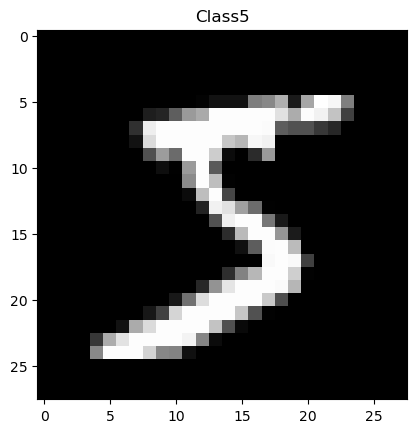

In [8]:
# Let's plot a grayscale image with the label
plt.imshow(X_train[0], cmap='gray')
plt.title('Class' + str(y_train[0]))
plt.show()

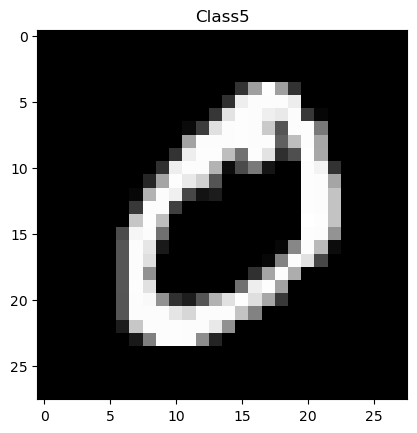

In [9]:
# Let's plot a grayscale image with the label
plt.imshow(X_train[1], cmap='gray')
plt.title('Class' + str(y_train[0]))
plt.show()

In [10]:
# TensorFlow can handle format: (batch, height, width, channel)

# For gray-scale images, channel = 1
# For red green and blue, channel = 3
# features_train = X_train.reshape(X_train.shape[0], 28, 28, 3)

features_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
features_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [11]:
features_train = features_train.astype('float32')
features_test = features_test.astype('float32')

In [12]:
# very similar to min-max normalization: we transform the values
# within the range [0,1] as usual

features_train /= 255
features_test /= 255

**One hot encoding**

Problem is that activation functions are usually transformed the inputs into the range zero and one

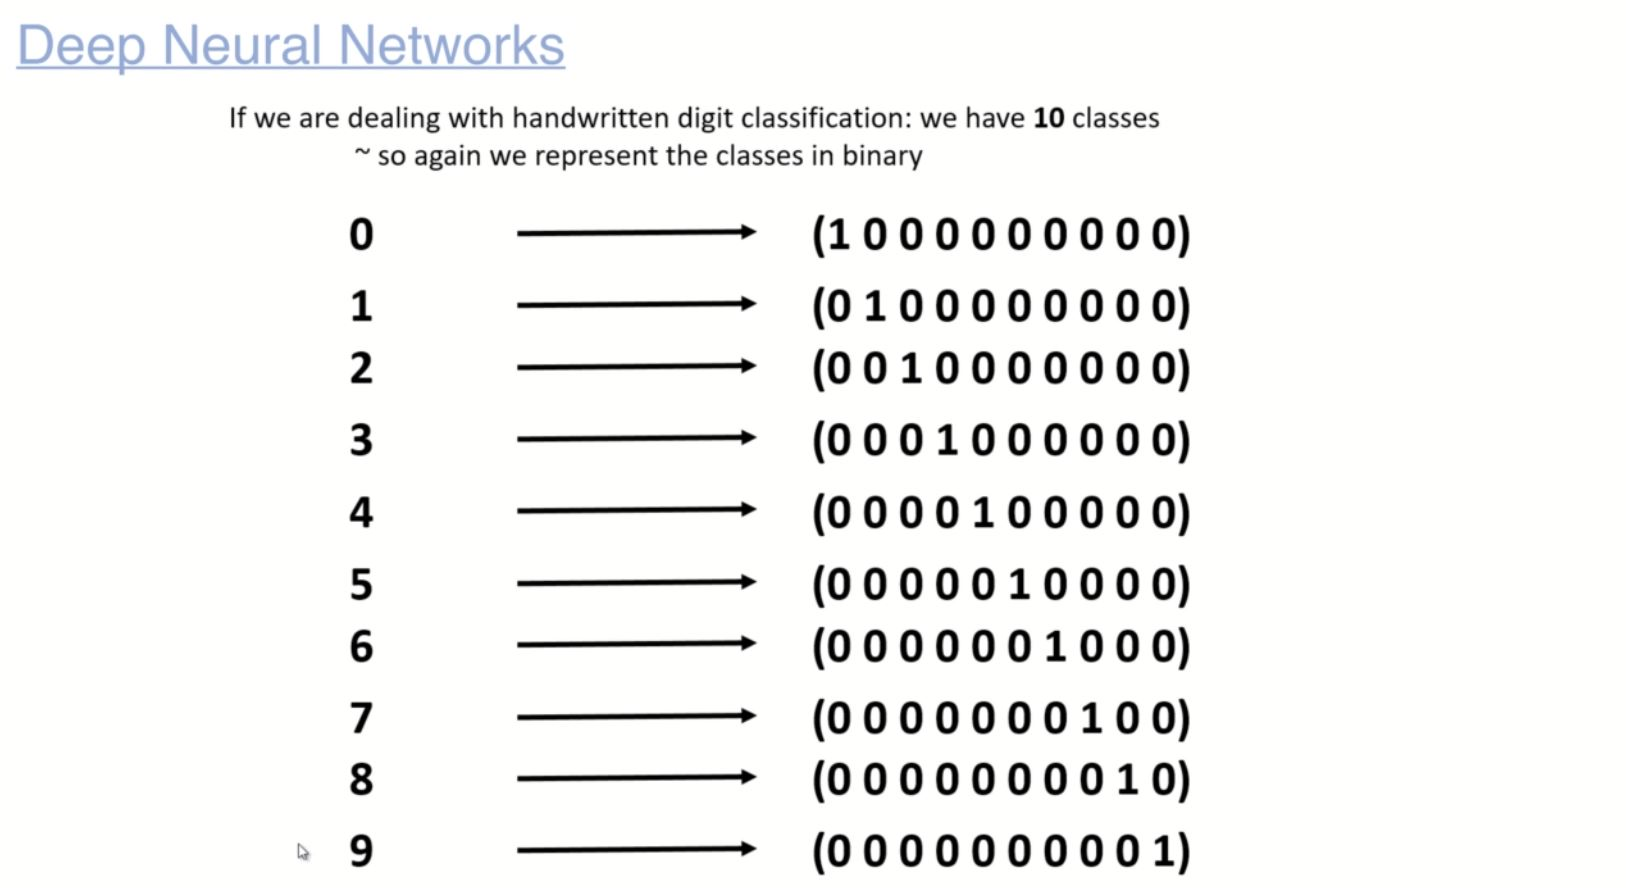

In [13]:
# we have 10 output classes we want to end up with one hot encoding
# 10 output classes [0 1 2 3 4 5 6 7 8 9]

# as we have seen for the Iris dataset
# 2 -> [0 0 1 0 0 0 0 0 0 0]

targets_train = to_categorical(y_train, 10)
targets_test = to_categorical(y_test, 10)

# Convolutional Neural Network

In [14]:
# Let's build the Convolutional Neural Network (CNN)
model = Sequential()

# input is a 28x28 pixels image
# 32 is the number of filters - (3,3) size of the filter/kernel

# For colored images, 28, 28 = 28x28
# channel = 1
# model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1)))

# stride - 1 pixel right (horizontally), 1 pixel down (vertically)
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1)))

model.add(Activation('relu'))

# normalizes the activations in the previous layer after the convolutional phase
# transformtion maintains the mean activation close to 0 std close to 1
# the scale of each dimension remains the same
# reduces running-time of training significantly
model.add(BatchNormalization())

# Covolutional layer
# 32 features detectors/filters
# every single pixel is 3x3 pixel
model.add(Conv2D(32, (3,3)))

model.add(Activation('relu'))

# Maximum pooling layer
# (pool_size=(2, 2)) , window size is 2 pixel horizontally and 2 pixel vertically
model.add(MaxPooling2D(pool_size=(2, 2)))

# BatchNormalization in the previous layers
model.add(BatchNormalization())

# Another convolutional layer
# 64 as the number of filters
# filter size is 3 pixel by 3 pixel
model.add(Conv2D(64, (3, 3)))

model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully connected hidden layer
model.add(Dense(512))

model.add(Activation('relu'))

model.add(BatchNormalization())

# regularization helps to avoid overfitting
model.add(Dropout(0.3))

# Output layer of Convolutional Neural Network
# Number of possible output = 10 [0 1 2 3 4 5 6 7 8 9]
model.add(Dense(10, activation='softmax'))

model.summary()

# Compilation
# multiclass classification: cross-entropy loss-function with Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# in case of regression problem, we use mean squared error, loss='mean_squared_error'

model.fit(features_train, targets_train, batch_size=128, epochs=5, validation_data=(features_test, targets_test), verbose=1)

score = model.evaluate(features_test, targets_test)
print('Test accuracy: %.2f' %score[1])

# print('Test accuracy: %.2f' %score[0])
# it will return with the loss function value

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                     

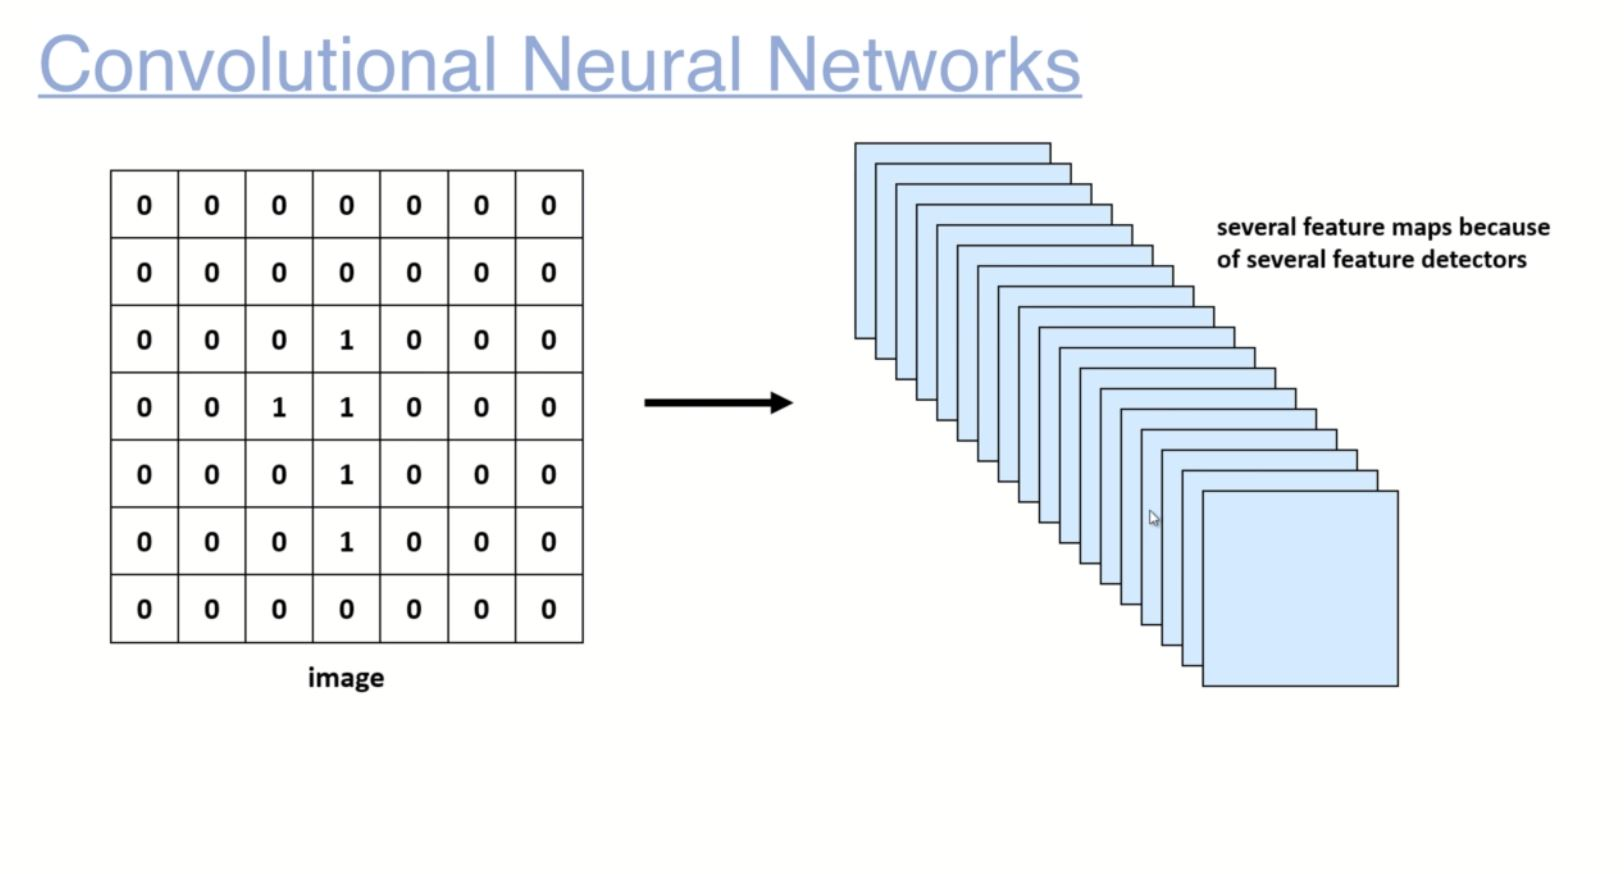

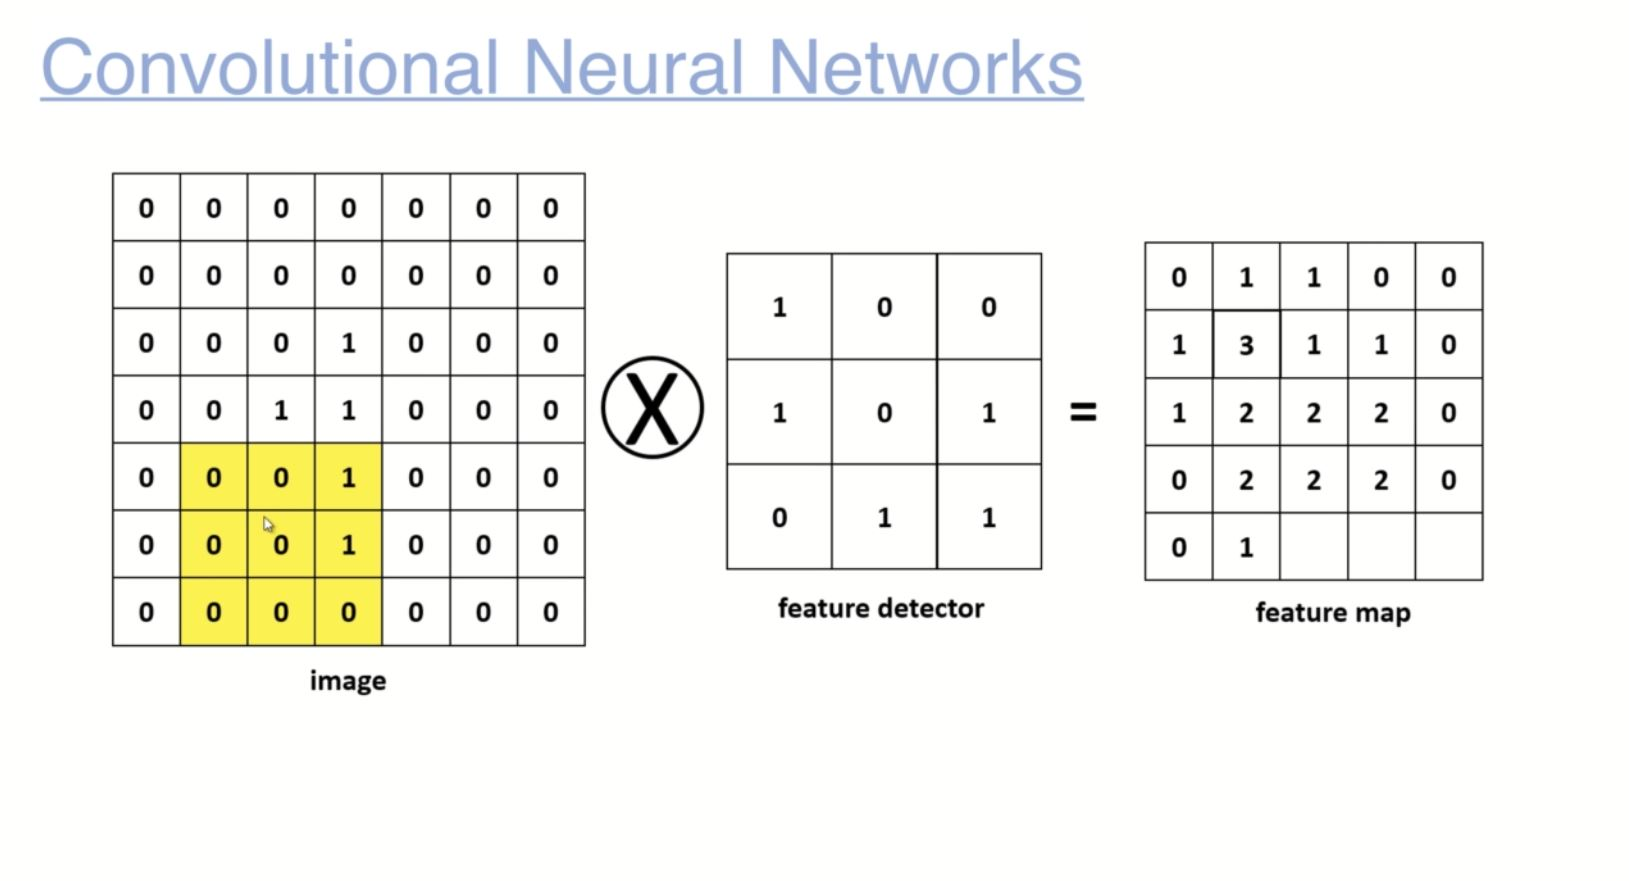

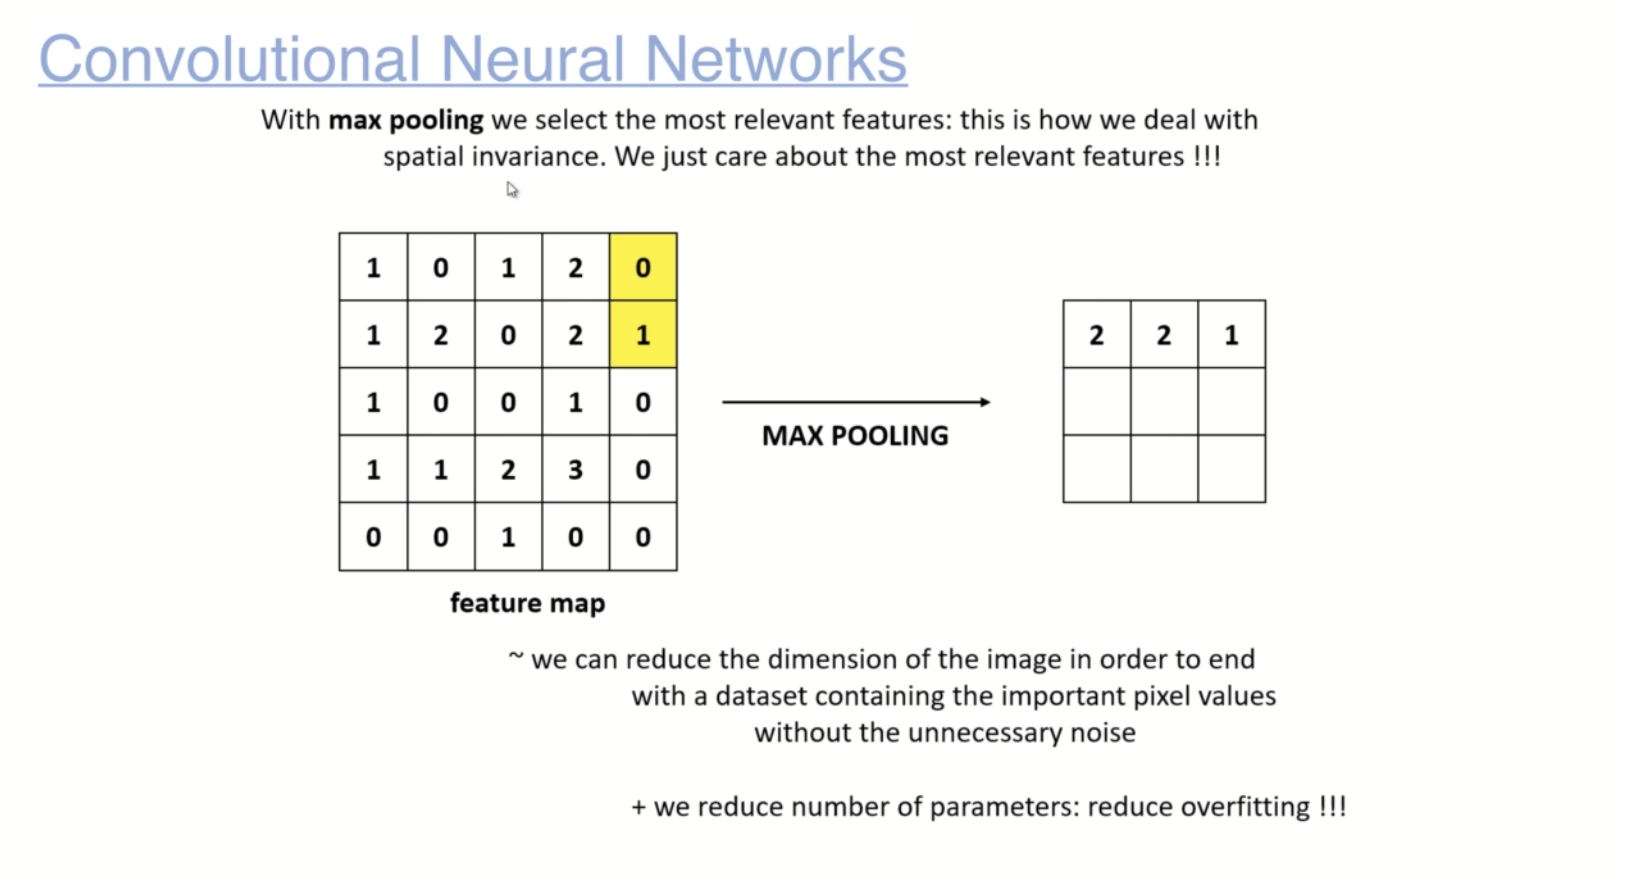

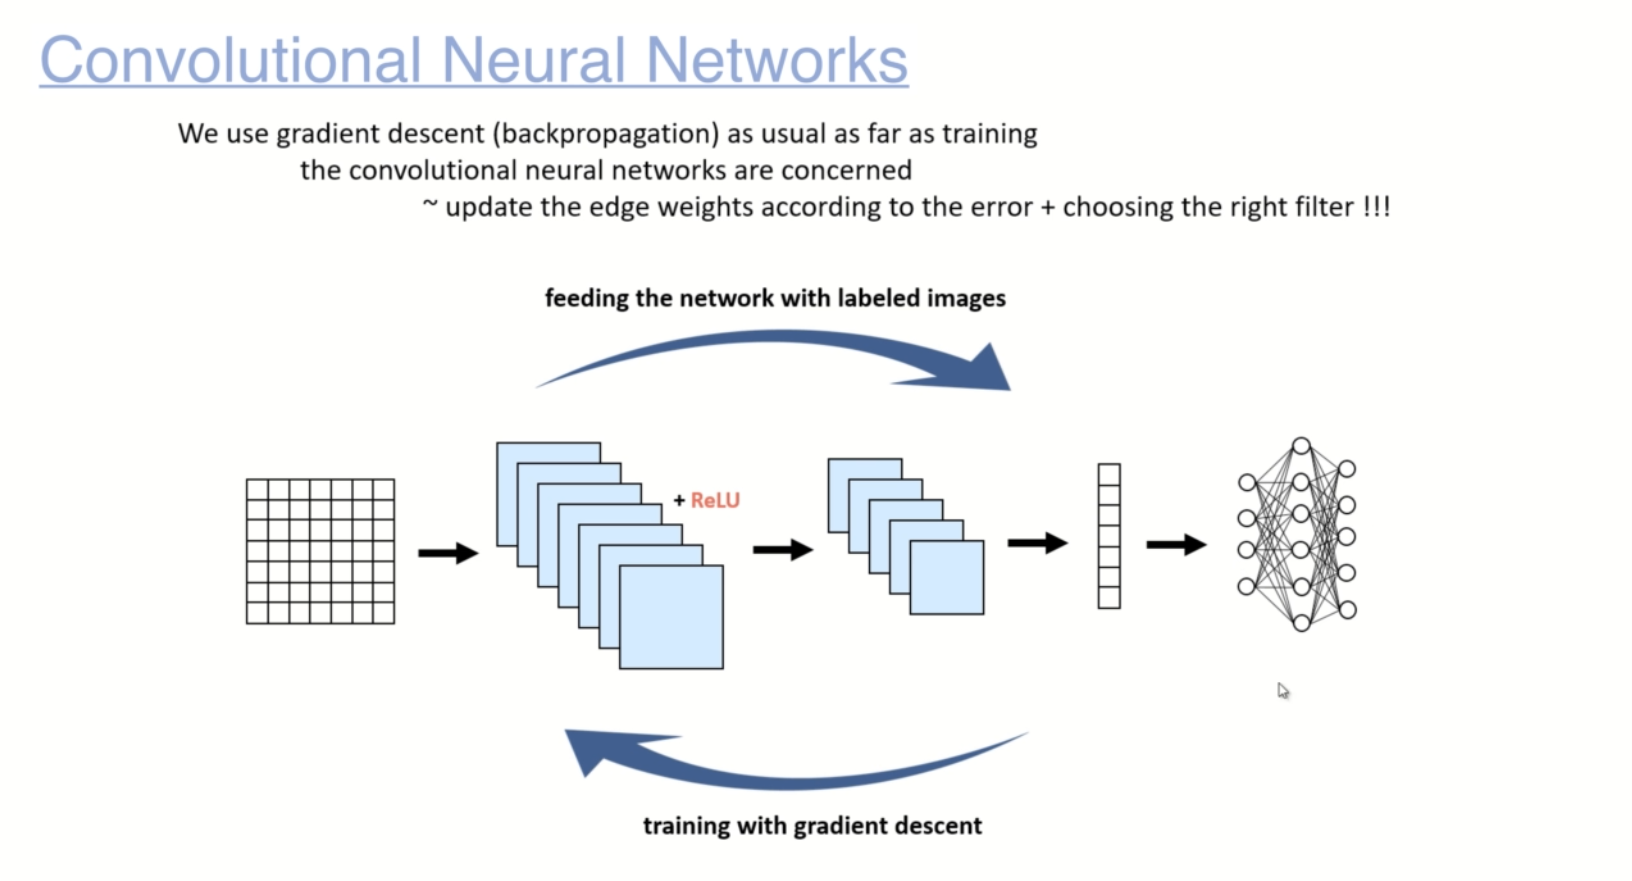

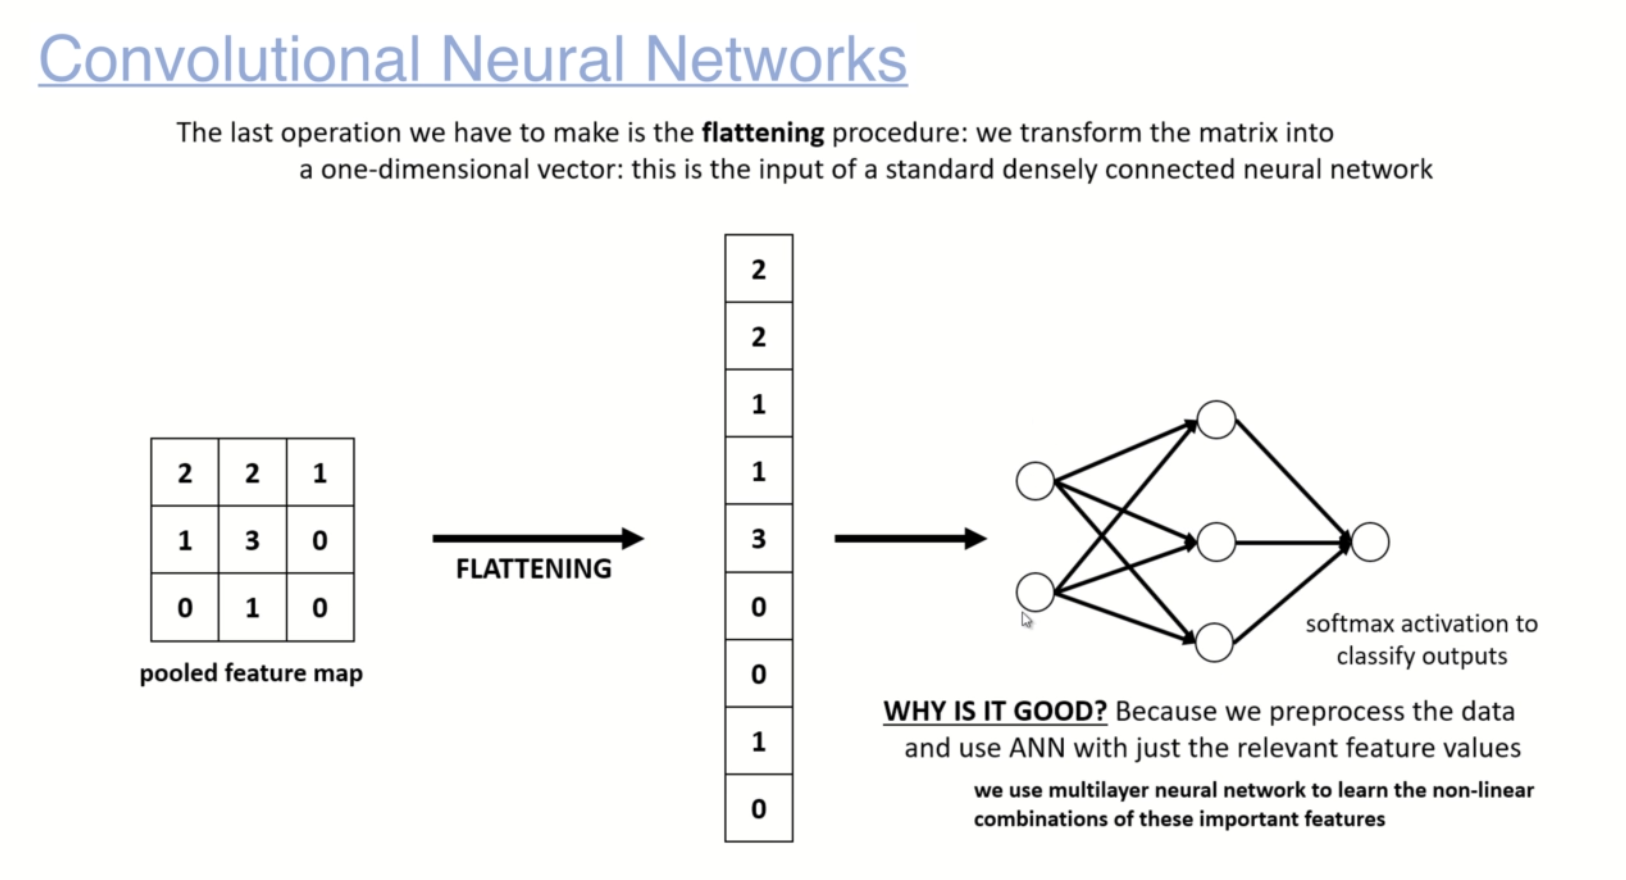

# Data Augmentation

In [15]:
# Data augmentation
# How to boost convolutional neural network

In [16]:
# Let's build the Convolutional Neural Network (CNN)
model = Sequential()

# input is a 28x28 pixels image
# 32 is the number of filters - (3,3) size of the filter/kernel

# For colored images, 28, 28 = 28x28
# channel = 1
# model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1)))

# stride - 1 pixel right (horizontally), 1 pixel down (vertically)
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1)))

model.add(Activation('relu'))

# normalizes the activations in the previous layer after the convolutional phase
# transformtion maintains the mean activation close to 0 std close to 1
# the scale of each dimension remains the same
# reduces running-time of training significantly
model.add(BatchNormalization())

# Covolutional layer
# 32 features detectors/filters
# every single pixel is 3x3 pixel
model.add(Conv2D(32, (3,3)))

model.add(Activation('relu'))

# Maximum pooling layer
# (pool_size=(2, 2)) , window size is 2 pixel horizontally and 2 pixel vertically
model.add(MaxPooling2D(pool_size=(2, 2)))

# BatchNormalization in the previous layers
model.add(BatchNormalization())

# Another convolutional layer
# 64 as the number of filters
# filter size is 3 pixel by 3 pixel
model.add(Conv2D(64, (3, 3)))

model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully connected hidden layer
model.add(Dense(512))

model.add(Activation('relu'))

model.add(BatchNormalization())

# regularization helps to avoid overfitting
model.add(Dropout(0.3))

# Output layer of Convolutional Neural Network
# Number of possible output = 10 [0 1 2 3 4 5 6 7 8 9]
model.add(Dense(10, activation='softmax'))

model.summary()

# Compilation
# multiclass classification: cross-entropy loss-function with Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# in case of regression problem, we use mean squared error, loss='mean_squared_error'

# model.fit(features_train, targets_train, batch_size=128, epochs=5, validation_data=(features_test, targets_test), verbose=1)

# score = model.evaluate(features_test, targets_test)
# print('Test accuracy: %.2f' %score[1])

# print('Test accuracy: %.2f' %score[0])
# it will return with the loss function value

# data augmentation helps to reduce overfitting
train_generator = ImageDataGenerator(rotation_range=7, width_shift_range=0.05, shear_range=0.0,
                                    height_shift_range=0.07, zoom_range=0.05)

# tf.keras.preprocessing.image.ImageDataGenerator

test_generator = ImageDataGenerator()

# we are not going to apply these transformations on the test dataset because these transformations make sure
# that the neural netwrork will work better in the sense that we are able to classify images more precisely.

# The test images are not going to be transformed so we can call the flow function on the train generator.

train_generator = train_generator.flow(features_train, targets_train, batch_size=64)
test_generator = test_generator.flow(features_test, targets_test, batch_size=64)

# steps_per_epoch=60000//64
# because batch_size=64
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, validation_data=test_generator,
                    validation_steps=10000//64)

# The fit_generator function assumes that there is an underlying function that generates the given dataset

# We have the flow function that generated the train generator and the test generator
# because we need these kinds of transformations for data augmentation

# Data augmentation has to reduce overfitting

# This what we want to achieve with dropout but usually we combine multiple approaches in order to avoid
# overfitting as much as possible

# This is why we can use the fit_generator

# The second crucial difference is that if we call the fit function
# model.fit(features_train, targets_train, batch_size=128, epochs=5, validation_data=(features_test, targets_test), verbose=1)
# then fit function is going to do these operations entirely in the random access memory.

# But, when we are dealing with real world applications with a huge dataset as usual these data augmentation
# then of course, the data is not fit into the random access memory

# This is another crucial difference between the fit_generator and the fit function


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_5 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 batch_normalization_4 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                 

C:\Users\Muhammad Iqbal\AppData\Local\Temp\ipykernel_11444\3734404388.py:101: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, validation_data=test_generator,


Epoch 1/5
937/937 [==============================] - 109s 113ms/step - loss: 0.1330 - accuracy: 0.9577 - val_loss: 0.0363 - val_accuracy: 0.9879
Epoch 2/5
937/937 [==============================] - 100s 106ms/step - loss: 0.0588 - accuracy: 0.9817 - val_loss: 0.0354 - val_accuracy: 0.9890
Epoch 3/5
937/937 [==============================] - 100s 107ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0308 - val_accuracy: 0.9897
Epoch 4/5
937/937 [==============================] - 117s 125ms/step - loss: 0.0409 - accuracy: 0.9876 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 5/5
937/937 [==============================] - 108s 115ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0199 - val_accuracy: 0.9933
